<a href="https://colab.research.google.com/github/KennetJRamirez/Pr-ctica-01---Introducci-n-a-las-redes-neuronalescon-Keras/blob/main/7690_21_2903_Kennet_Joab_Guzman_Ramirez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Primera-práctica:-Introducción-a-las-redes-neuronales-con-Keras" data-toc-modified-id="Primera-práctica:-Introducción-a-las-redes-neuronales-con-Keras-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Primera práctica: Introducción a las redes neuronales con Keras</a></span><ul class="toc-item"><li><span><a href="#1.-Información-sobre-el-dataset" data-toc-modified-id="1.-Información-sobre-el-dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. Información sobre el dataset</a></span></li><li><span><a href="#2.-Entrenamiento-de-una-red-neuronal-simple" data-toc-modified-id="2.-Entrenamiento-de-una-red-neuronal-simple-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. Entrenamiento de una red neuronal simple</a></span></li><li><span><a href="#3.-Evaluación-del-modelo-en-datos-de-test" data-toc-modified-id="3.-Evaluación-del-modelo-en-datos-de-test-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. Evaluación del modelo en datos de test</a></span></li></ul></li></ul></div>

# Primera práctica: Introducción a las redes neuronales con Keras

En esta primera práctica, vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados** (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

Primero, vamos a obtener los datos. Por suerte para nosotros, estos
pueden ser descargados directamente desde Keras, por lo que no tendremos que preocuparnos de tratar con ficheros.

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Acto seguido, normalizamos esos datos de manera similar a como hemos visto con MNIST, obteniendo valores entre 0 y 1. Este paso es muy importante para el correcto funcionamiento de nuestra red.

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.5 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [8]:
print("Cantidad de imágenes de entrenamiento:", x_train.shape[0])
print("Cantidad de imágenes de test:", x_test.shape[0])
print("Tamaño de cada imagen:", x_train.shape[1], "x", x_train.shape[2])

Cantidad de imágenes de entrenamiento: 60000
Cantidad de imágenes de test: 10000
Tamaño de cada imagen: 28 x 28


El conjunto de entrenamiento contiene 60,000 imágenes.

El conjunto de prueba contiene 10,000 imágenes.

Cada imagen tiene un tamaño de 28 x 28 píxeles, en escala de grises.

**Pregunta 1.2 *(0.5 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

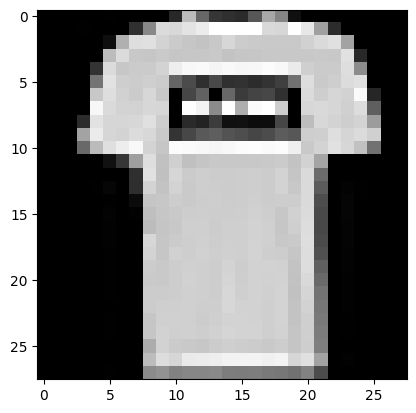

Etiqueta de la imagen: 0


In [11]:
import matplotlib.pyplot as plt

# Función para visualizar un ejemplo de imagen
def visualize_example(image_data):
    plt.imshow(image_data, cmap='gray')
    plt.show()

# Visualizar un ejemplo del conjunto de entrenamiento
visualize_example(x_train[1])
print("Etiqueta de la imagen:", y_train[1])


El dataset Fashion MNIST tiene imágenes de prendas de ropa en blanco y negro, todas de 28x28 píxeles. Hay 60,000 imágenes para entrenar y 10,000 para probar el modelo. Las imágenes están en x_train y x_test, mientras que las etiquetas que indican el tipo de ropaestán en y_train y y_test. Las etiquetas son números del 0 al 9, donde cada número corresponde a una prenda y valor de la etiqueta

Vamos a **visualizar** una imagen de ejemplo. Prueba tu mismo a cambiar la imagen en uso para explorar el dataset visualmente ejecutando el siguiente código:

In [12]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

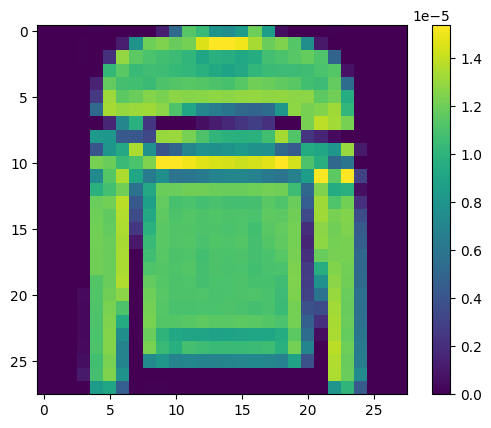

In [13]:
visualize_example(x_train[5])

## 2. Entrenamiento de una red neuronal simple

**Pregunta 2 *(7.0 puntos)***. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Dos hidden layers de tamaños 128 y 64, utilizando unidades **sigmoid**
* Optimizador **sgd**.
* Durante el entrenamiento, la red tiene que mostrar resultados de **loss** y **accuracy** por cada epoch.
* La red debe entrenar durante **20 epochs** y batch size de **64**.
* La última capa debe de ser una capa **softmax**.

Tu red tendría que ser capaz de superar fácilmente 60% de accuracy.

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical


(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))


test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc * 100:.2f}%')


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2571 - loss: 2.2641 - val_accuracy: 0.4440 - val_loss: 2.0020
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4807 - loss: 1.8858 - val_accuracy: 0.6168 - val_loss: 1.5771
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5923 - loss: 1.4973 - val_accuracy: 0.6015 - val_loss: 1.3138
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6385 - loss: 1.2590 - val_accuracy: 0.6578 - val_loss: 1.1445
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6675 - loss: 1.1102 - val_accuracy: 0.6838 - val_loss: 1.0251
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6883 - loss: 0.9925 - val_accuracy: 0.6921 - val_loss: 0.9355
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7036 - loss: 0.9070 - val_accuracy: 0.7081 - val_loss: 0.8667
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7180 - loss: 0.8422 - val_accuracy: 0.

## 3. Evaluación del modelo en datos de test

Una vez hemos entrenado nuestro modelo, vamos a evaluarlo en los datos de test de Fashion MNIST.

**Pregunta 3.1 *(1.0 puntos)***. Utilizando el modelo recién entrenado, obtener la accuracy resultante en el dataset de test.

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f'\nTest accuracy: {test_acc * 100:.2f}%')


313/313 - 1s - 2ms/step - accuracy: 0.7915 - loss: 0.5808

Test accuracy: 79.15%


**Pregunta 3.2 *(1.0 puntos)***. Utilizando el método **predict** de Keras, realizar predicciones para los datos de test. Por cada predicción resultante, ¿qué significan los números que obtenemos al hacer predict? ¿Cómo podemos obtener el valor de la clase resultante? (recordar que estamos utilizando una capa softmax para clasificar).

In [21]:
import numpy as np


predictions = model.predict(X_test)

for i in range(5):
    print(f"Predicción para la imagen {i + 1}:")
    print(f"Probabilidades para cada clase: {predictions[i]}")
    print(f"Clase predicha: {np.argmax(predictions[i])}")
    print(f"Etiqueta real: {np.argmax(y_test[i])}\n")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicción para la imagen 1:
Probabilidades para cada clase: [2.8072300e-05 1.1358882e-05 3.3531080e-05 7.1014353e-04 2.3321378e-04
 1.7777207e-01 7.3277287e-04 2.5347042e-01 1.1717869e-02 5.5529064e-01]
Clase predicha: 9
Etiqueta real: 9

Predicción para la imagen 2:
Probabilidades para cada clase: [5.0826939e-03 4.3030112e-04 6.9841206e-01 7.8713818e-04 8.2257226e-02
 1.0735883e-03 2.0770749e-01 6.2712621e-07 4.2362283e-03 1.2687796e-05]
Clase predicha: 2
Etiqueta real: 2

Predicción para la imagen 3:
Probabilidades para cada clase: [5.0095713e-04 9.9583679e-01 4.2552879e-04 2.6763603e-03 1.9953398e-04
 2.5022108e-04 1.0526913e-04 4.0887121e-06 1.2956574e-06 5.4401198e-08]
Clase predicha: 1
Etiqueta real: 1

Predicción para la imagen 4:
Probabilidades para cada clase: [5.21990820e-04 9.92245197e-01 3.50250426e-04 5.96560771e-03
 2.55003339e-04 4.96336201e-04 1.52740526e-04 1.10691935e-05
 1.50483822e-06 2.42123434e-07]
Clase predicha: 1
Etique

Cuando usamos predict de Keras, nos da probabilidades de cada clase. O sea, el modelo nos dice qué tan seguro está de que la imagen pertenece a cada una de las 10 clases, y todo suma 1 gracias a la capa softmax.

Para saber qué clase predijo, usamos np.argmax(predictions[i]). Esto nos da el índice del valor más alto en el arreglo, que es la clase que el modelo cree que es la correcta.